In [99]:
import pandas as pd 

## ignore warnings
import warnings

## ignore warnings
warnings.filterwarnings('ignore')

In [100]:
df = pd.read_csv('data/training_data.csv')

In [40]:
df = df[df['class'] != 5]

## Eda

In [41]:
df.tail()

,id,text,class,volunteers_count,judgment_confidence
15459,11284,i really do feel it is beaten into us to breas...,0,4.0,0.773593
15460,11964,RT @Rockprincess818: Go fight against the IDF ...,2,6.0,0.500000
15461,5390,i dont feel the need to be truthful its comple...,1,5.0,1.000000
15462,860,im feeling pretty discouraged this morning,0,2.0,0.851956
15463,15795,i feel very graceful today,1,3.0,1.000000


In [42]:
df[df['class'] == 1]

,id,text,class,volunteers_count,judgment_confidence
2,16632,i just need to find ways to feel pretty,1,4.0,0.852762
4,3079,im feeling mellow and am enjoying the cooler w...,1,4.0,0.953162
9,3016,im sure it feels wonderful,1,3.0,0.864743
13,9541,i have survived the low part of the crash im s...,1,3.0,0.813694
20,7839,i prayed to trust god with my desire to feel a...,1,3.0,1.000000
...,...,...,...,...,...
15450,769,i feel very amused at that pic,1,3.0,0.710439
15454,11363,i want to box because i feel more confident in...,1,3.0,0.923899
15457,16850,i feel contented but i m going to bet that i l...,1,4.0,0.799997
15461,5390,i dont feel the need to be truthful its comple...,1,5.0,1.000000


In [43]:
df.head()

,id,text,class,volunteers_count,judgment_confidence
0,366,i would not feel hesitant in using the medical...,4,3.0,0.917835
1,9003,i try to stuff my wildly feeling heart and mes...,0,3.0,0.788853
2,16632,i just need to find ways to feel pretty,1,4.0,0.852762
3,2199,i think the protection part is the part where ...,0,4.0,0.793927
4,3079,im feeling mellow and am enjoying the cooler w...,1,4.0,0.953162


In [44]:
df.columns

Index(['id', 'text', 'class', 'volunteers_count', 'judgment_confidence'], dtype='object')

In [45]:
df.query('text.str.len() <20')

,id,text,class,volunteers_count,judgment_confidence
93,425,Charlie bit me,2,3.0,1.000000
114,8596,i feel so annoyed,3,2.0,1.000000
249,4667,i feel agitated,3,4.0,0.895352
284,1535,i dun feel happy,1,3.0,0.874027
442,8255,Long yellow.,2,6.0,1.000000
...,...,...,...,...,...
15174,11093,i feel so cute,1,2.0,0.960544
15328,7526,fear of thief,4,3.0,0.961709
15393,7208,i feel smart though,1,3.0,0.880569
15416,1585,i do feel confused,4,4.0,1.000000


In [101]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15464 entries, 0 to 15463
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   15464 non-null  int64  
 1   text                 15464 non-null  object 
 2   class                15464 non-null  int64  
 3   volunteers_count     15464 non-null  float64
 4   judgment_confidence  15464 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 604.2+ KB


In [102]:
df.describe()

,id,class,volunteers_count,judgment_confidence
count,15464.000000,15464.000000,15464.000000,15464.000000
mean,9422.902483,1.629397,3.171948,0.881498
std,5454.528641,1.389931,0.776514,0.128627
min,1.000000,0.000000,-0.000000,0.322501
25%,4685.750000,1.000000,3.000000,0.788922
50%,9420.500000,1.000000,3.000000,0.922475
75%,14153.250000,2.000000,4.000000,1.000000
max,18858.000000,5.000000,9.000000,1.000000


<AxesSubplot:>

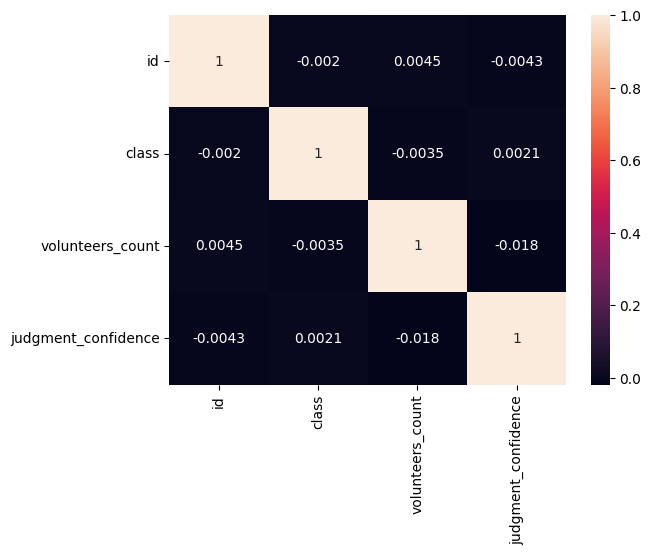

In [103]:
## give me the correlation matrix with the sea born
import seaborn as sns

sns.heatmap(df.corr(), annot=True)


In [49]:
df['volunteers_count'].unique()

array([ 3.,  4.,  2.,  5.,  1.,  6.,  9.,  7., -0.])

In [50]:
df['judgment_confidence'].unique()

array([0.91783472, 0.78885252, 0.85276185, ..., 0.99387755, 0.77359276,
       0.85195607])

In [104]:
class_counts = df['class'].value_counts()

class_counts

1    4397
0    3826
2    3440
3    1756
4    1573
5     472
Name: class, dtype: int64

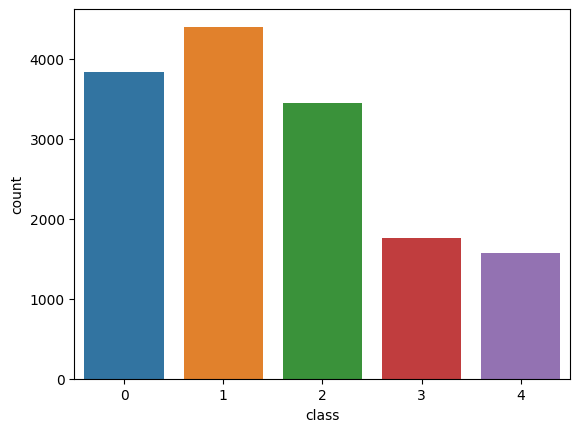

In [52]:

import seaborn as sns
import matplotlib.pyplot as plt



sns.countplot(x='class', data=df)
plt.show()



### Text Preprocessing

In [105]:

import re

def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext

def cleanPunc(sentence):
    cleaned = re.sub(r'[^a-zA-Z0-9\s]', '', sentence)
    cleaned = re.sub(r'\s+', ' ', cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned


def removeSpace(sentence: str) -> str:
    sentence = sentence.strip()
    sentence = sentence.replace("\n"," ")
    return sentence



In [54]:
# df['text'] =df['text'].apply(cleanHtml)
# df['text']= df['text'].apply(cleanPunc)

# df['text'] 

## Removing Stop Words

In [106]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within',])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)

## removing Numbers

In [56]:
def removeNumber(sentence):
    sentence = re.sub(r"\d+", "", sentence)
    return sentence


In [84]:
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

print(re_stop_words.search('not'))


None


### Stemming

In [107]:

from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

In [59]:
def removeUrl(sentence):
    cleaned = re.sub(r'http\S+', '', sentence)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned





### Lemmatization



In [60]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

lemmatizer = WordNetLemmatizer()

def lemmatizeWord(word):
    return lemmatizer.lemmatize(word)



df['text'].iloc[10:30]




10                               before an exam which i
11    i feel heartbroken and worried and i have a wi...
12                 i feel heartless in saying so though
13    i have survived the low part of the crash im s...
14    i begin to feel unpleasant about anime fandom ...
15    i can brandish this article at anyone who make...
16    i know karen wouldnt see it that way if i addr...
17                     i feel disrespected and insulted
18                          Double Stuff Oreos mane say
19    i realise that desiring a substance to feed a ...
20    i prayed to trust god with my desire to feel a...
21    i felt like the boys were disadvantaged missin...
22    RT @El_Grillo1: In the ME, the crow would eat ...
23    i feel the need to write even though i really ...
24    i have a large parcel of time or am feeling re...
25         i feel stress free heading into the holidays
26    im with her most of the time i feel perfectly ...
27    i have never met in real life but feel sup

## Proccessing Text [First  Attempt]

In [108]:
from nltk.tokenize import TweetTokenizer
import nltk


def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent


def proccess_text(text):
    text = text.lower()
    ## removing numbers
    text = removeUrl(text)
    text = removeNumber(text)
    ## removing stop words
    text = removeStopWords(text)

    ## clean html
    # text = cleanHtml(text)

    ## clean punctuation
    text = cleanPunc(text)

    text = keepAlpha(text)



    ## remove space
    text = removeSpace(text)

    ## stemming 
    # text = stemming(text)

    
    

    
    ## tokenizing words
    words = TweetTokenizer(
        # strip_handles=True, reduce_len=True
    )
    
    # words = [lemmatizeWord(word) for word in words.tokenize(text)]

    words = words.tokenize(text)
    return ' '.join(words)



df['text'] = df['text'].apply(proccess_text)

df['text']

0          would feel hesitant using medical system needed
1        try stuff wildly feeling heart messy insides s...
2                               need find ways feel pretty
3        think protection part part feel abused reasons...
4                im feeling mellow enjoying cooler weather
                               ...                        
15459                     really feel beaten us breastfeed
15460    rt rockprincess go fight idf progressive trash...
15461        dont feel need truthful completely written me
15462                im feeling pretty discouraged morning
15463                                  feel graceful today
Name: text, Length: 15464, dtype: object

In [62]:
df['text'].iloc[4]

'im feeling mellow enjoying cooler weather'

## Machine Learning Model 

### getting the Test data


In [28]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [109]:
df_test = pd.read_csv('data/testing_data.csv')

df_test['text'] = df_test['text'].apply(proccess_text)

df_test



,id,text,volunteers_count,judgment_confidence
0,8846,rt dnainfochi new nature area replacing indian...,3.0,1.000000
1,10369,feel triumphant ive found s,3.0,0.839630
2,16112,feel ive beaten words men grounds cant sleep b...,3.0,0.924088
3,13646,thought great must feel author created story p...,3.0,0.890124
4,651,rt yankees drob comes close game th yankees,3.0,1.000000
...,...,...,...,...
3390,12854,guess meant assume photos words way convey rea...,3.0,1.000000
3391,5893,feeling pretty impressed myself,4.0,0.951436
3392,10017,rt taylorcaniff wear beanies winter long banda...,3.0,1.000000
3393,1593,feel like maybe everything resolved get living...,3.0,0.938612


In [64]:

## visualizing some of the data
df_test.iloc[0:10]





,id,text,volunteers_count,judgment_confidence
0,8846,rt dnainfochi new nature area replacing indian...,3.0,1.000000
1,10369,feel triumphant ive found s,3.0,0.839630
2,16112,feel ive beaten words men grounds cant sleep b...,3.0,0.924088
3,13646,thought great must feel author created story p...,3.0,0.890124
4,651,rt yankees drob comes close game th yankees,3.0,1.000000
5,18124,didnt feel disheartened,3.0,1.000000
6,5995,wanted team girlfriend accept sport amp health...,3.0,0.824688
7,18780,rt kickman giants pitiful jetspitiful mets pit...,3.0,1.000000
8,10769,feeling extremely contented decision home educate,2.0,1.000000
9,8762,know feeling plans disturbed schedules disrupted,3.0,0.867333


## Getting Data

In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report


from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix




X_train , X_test, y_train, y_test = train_test_split(
        df.drop('class', axis=1), df['class'], test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12371, 4), (3093, 4), (12371,), (3093,))

In [66]:
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(X_train['text'])
vectorizer.fit(X_test['text'])

X_train_tfidf = vectorizer.transform(X_train['text'])
X_test_tfidf = vectorizer.transform(X_test['text'])



X_train_tfidf.toarray()

# nb_classifier = MultinomialNB()
# nb_classifier.fit(X_train_tfidf, train['class'])

# y_pred = nb_classifier.predict(X_test_tfidf)

# nb_classifier.score(X_test_tfidf, test['class'])




array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## XGBoost

## Predecting Local Test Data

In [113]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier



# X_train,y_train,X_test,y_test = train_test_split(
#     df,df['class'],test_size=0.2,
# )


In [112]:




test_vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1, 3), norm='l2')
text_pipeline = Pipeline([
    ('tfidf', 
     test_vectorizer)
])


full_pipeline = ColumnTransformer([
    ('text', text_pipeline, 'text'),  
    (
        'volunteers_count', 
        'passthrough',
        ['volunteers_count']
    ),
    (
        'judgment_confidence', 
        'passthrough',
        ['judgment_confidence']
    )
])


In [114]:

pipeline_with_xgb = Pipeline([
    ('preprocessing', full_pipeline),
    ('clf', XGBClassifier(
            tree_method='gpu_hist',
    ))      
])


X_train


,id,text,volunteers_count,judgment_confidence
14806,10161,boy like girls pretty like smile makes feel funny,3.0,0.906067
14920,7483,begin feel dull ache left side,3.0,1.000000
8545,7505,rt ibekoolz food goodexcept rice cook bitch mo...,3.0,0.666667
1731,9800,feel like going break second become mad derang...,3.0,0.899414
2622,15558,feel hated by,3.0,0.713687
...,...,...,...,...
5191,4775,och hoe wonderbaarlijk dat jan het alweer met ...,3.0,0.666667
13418,2023,feel though write often enough cruising life e...,3.0,1.000000
5390,777,love love way pride self satisfaction feel som...,3.0,0.758489
860,11140,im feeling low usually want lay bed nothing,4.0,0.917782


In [116]:

# pipeline_with_xgb.fit(X_train, y_train)

# y_pred = pipeline_with_xgb.predict(X_test)


# accuracy = accuracy_score(y_test, y_pred)

# print("Accuracy:", accuracy)


# from sklearn.metrics import confusion_matrix

# confusion_matrix(y_test, y_pred)




param_grid = {
    'clf__learning_rate': [0.1, 0.2],
    'clf__max_depth': [4,6],
    'clf__n_estimators': [ 200,500]
}

grid_search = GridSearchCV(pipeline_with_xgb, param_grid, cv=2 ,n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(
    X_test
)

accuracy = accuracy_score( y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

### Predecting Gloval Test Data

In [73]:
import pandas as pd


## train is df without column text
X_train =  df.drop('class',axis=1) 
y_train = df.drop(df.columns.difference(['class']), axis = 1)






In [74]:
pipeline_with_xgb.fit(X_train,y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('text',
                                                  Pipeline(steps=[('tfidf',
                                                                   TfidfVectorizer(ngram_range=(1,
                                                                                                3),
                                                                                   strip_accents='unicode'))]),
                                                  'text'),
                                                 ('volunteers_count',
                                                  'passthrough',
                                                  ['volunteers_count']),
                                                 ('judgment_confidence',
                                                  'passthrough',
                                                  ['judgment_confidence'])])),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=N...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [75]:
X_test = df_test
y_pred = pipeline_with_xgb.predict(X_test)


In [ ]:


# param_grid = {
#     'clf__learning_rate': [0.1, 0.3],
#     'clf__max_depth': [3, 4],
#     'clf__n_estimators': [100, 200]
# }

# grid_search = GridSearchCV(pipeline_with_xgb, param_grid, cv=3, verbose=2, n_jobs=-1)

# grid_search.fit(train, train['class'])

# print("Best Parameters:", grid_search.best_params_)
# print("Best Score:", grid_search.best_score_)

# best_estimator = grid_search.best_estimator_
# y_pred = best_estimator.predict(test)

# accuracy = accuracy_score(test['class'], y_pred)
# print("Accuracy:", accuracy)

# print("Classification Report:")
# print(classification_report(test['class'], y_pred))

##  Multiple Binary Classifications - (One Vs Rest Classifier)


In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.multioutput import MultiOutputClassifier
# from sklearn.datasets import make_multilabel_classification
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report



# pipeline_with_randomForest  = Pipeline([
#         ('preprocessing', full_pipeline),
#     ('clf',
#         MultiOutputClassifier(
#             RandomForestClassifier(n_estimators=1000, random_state=42)
#         )
#      )]
# )

# pipeline_with_randomForest.fit(train, train['class'])

# y_pred = pipeline_with_randomForest.predict()

# accuracy = accuracy_score(test['class'], train['class'])

# print("Accuracy:", accuracy)

In [ ]:
# import ubml 

# metrics_performance, best_model = ubml.model_train_test(mode='classification', x_train = X_train_tfidf.toarray(), x_test = X_test_tfidf, y_train = y_train, y_test = y_test)
# print('the best model is :',best_model)
# metrics_performance

In [ ]:
# %pip install scikit-multilearn

In [ ]:
# from skmultilearn.problem_transform import LabelPowerset
# from sklearn.naive_bayes import GaussianNB
# from sklearn.pipeline import Pipeline


# # initialize LabelPowerset multi-label classifier

# classifier = LabelPowerset(GaussianNB())


# # 
# pipeline_with_lb  = Pipeline([
#         ('preprocessing', full_pipeline),
#     ('clf',
#             classifier
#      )  
# ]
# )

# pipeline_with_lb.fit(X_train,y_train)

# y_pred = pipeline_with_lb.predict(test)

# accuracy = accuracy_score(y_test, y_pred)

# print("Accuracy:", accuracy)

## filling the submission file with the predictions

In [77]:
import csv 
output_df = pd.DataFrame({'id': df_test['id'], 'class': y_pred})

output_df.to_csv('data/output.csv', index=False, quoting=csv.QUOTE_NONNUMERIC)
